# Importing Packages

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
df=pd.read_excel(r'C:\Users\ANJALI S RAJAN\Desktop\covid\corona.xlsx')
df.head()

,Date,Confirmed,Recovered,Deceased,Transferred,Critical,Active,Import,Contact,No History,Tested,Observation,Home Observation,Hosptilised,Vaccine First Dose,Vaccine Second Dose,Total Vaccine
0,2020-01-30,1,NaN,0,0,NaN,1,1,0,NaN,0,0,0,0,NaN,NaN,NaN
1,2020-01-31,1,NaN,0,0,NaN,1,0,0,NaN,0,1471,1421,50,NaN,NaN,NaN
2,2020-02-01,1,NaN,0,0,NaN,1,0,0,NaN,39,1793,1723,70,NaN,NaN,NaN
3,2020-02-02,2,NaN,0,0,NaN,2,1,0,NaN,106,1999,1924,75,NaN,NaN,NaN
4,2020-02-03,3,NaN,0,0,NaN,3,1,0,NaN,140,2239,2155,84,NaN,NaN,NaN


In [182]:
df=df[['Date',"Confirmed"]]
df.head()

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-03,3


In [183]:

df.set_index("Date",inplace=True)
df.head()

,Confirmed
Date,
2020-01-30,1
2020-01-31,1
2020-02-01,1
2020-02-02,2
2020-02-03,3


In [184]:
df.head()

,Confirmed
Date,
2020-01-30,1
2020-01-31,1
2020-02-01,1
2020-02-02,2
2020-02-03,3


# Adfuller Test
Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series. Stationary is very important factor on time series.

In [185]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df["Confirmed"])

In [186]:
def adfuller_test(Confirmed):
    result=adfuller(Confirmed)
    labels=["ADF Test Statistic","p-value","nlags","Number of observations used"]
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1]<=0.05:
        print("Strong Evidence against the null hypothesis(HO),the null hypothesis data has")
    else:
        print("weak evidence againt null hypothesis,time series has a unit root, indicating it is not stationary")
    

In [187]:
adfuller_test(df["Confirmed"])

ADF Test Statistic:3.2263926446339553
p-value:1.0
nlags:15
Number of observations used:445
weak evidence againt null hypothesis,time series has a unit root, indicating it is not stationary




# Differencing

In [188]:
df['Confirmed difference']=df["Confirmed"]-df["Confirmed"].shift(1)
df['Seasonal difference']=df["Confirmed"]-df["Confirmed"].shift(30)

In [189]:
df.tail()

,Confirmed,Confirmed difference,Seasonal difference
Date,,,
2021-04-30,1571183,37199.0,446599.0
2021-05-01,1606819,35636.0,479437.0
2021-05-02,1638778,31959.0,508888.0
2021-05-03,1664789,26011.0,532358.0
2021-05-04,1701979,37190.0,566746.0


In [190]:
adfuller_test(df['Seasonal difference'].dropna())

ADF Test Statistic:-0.5222603353859088
p-value:0.88759885233138
nlags:14
Number of observations used:416
weak evidence againt null hypothesis,time series has a unit root, indicating it is not stationary


<AxesSubplot:xlabel='Date'>

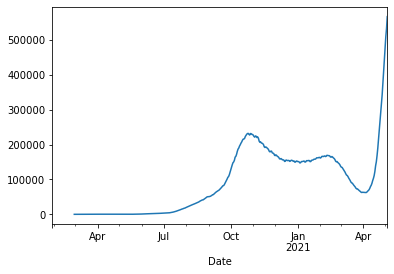

In [191]:
df['Seasonal difference'].plot()

<AxesSubplot:xlabel='Date'>

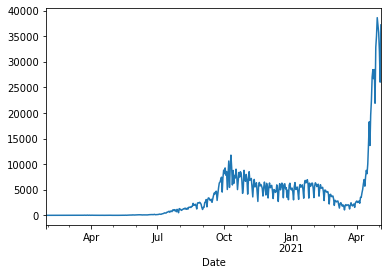

In [192]:
df['Confirmed difference'].plot()

In [193]:
df.isnull().sum()

Confirmed                0
Confirmed difference     1
Seasonal difference     30
dtype: int64

In [194]:
df["Confirmed difference"].fillna(df["Confirmed difference"].mode()[0],inplace=True)
df["Seasonal difference"].fillna(df["Seasonal difference"].mode()[0],inplace=True)


In [195]:
df.isnull().sum()

Confirmed               0
Confirmed difference    0
Seasonal difference     0
dtype: int64

# Auto Regressive model
In statistics, econometrics and signal processing, an autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc.

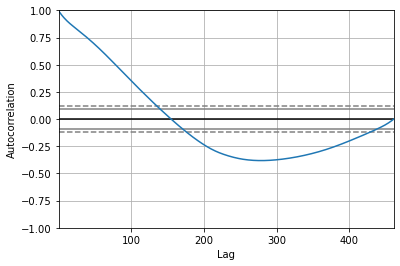

In [196]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Confirmed'])
plt.show()

In [197]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels as sms

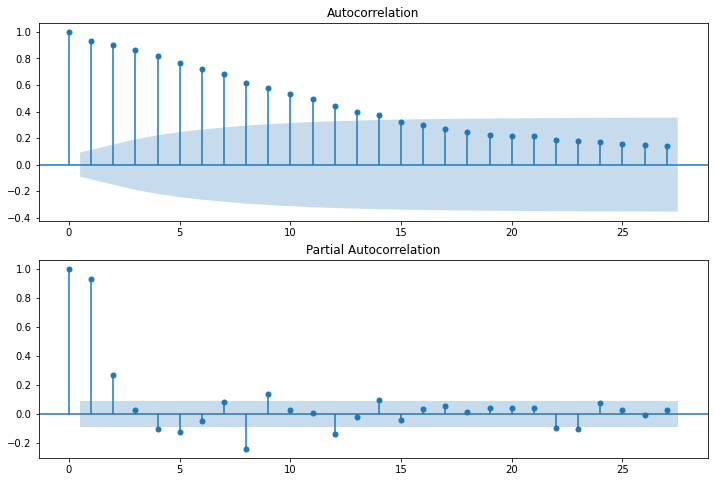

In [198]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sms.graphics.tsaplots.plot_acf(df['Confirmed difference'],ax=ax1)
ax2=fig.add_subplot(212)
fig=sms.graphics.tsaplots.plot_pacf(df["Confirmed difference"],ax=ax2)

# Arima Model
An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. A statistical model is autoregressive if it predicts future values based on past values.

In [199]:
from statsmodels.tsa.arima_model import ARIMA

In [200]:
model=ARIMA(df["Confirmed"],order=(1,1,0))
model_fit=model.fit()


In [201]:
import statsmodels.api as sm


In [202]:
model=sm.tsa.statespace.SARIMAX(df['Confirmed'],order=(1,1,0),seasonal_order=(1,1,1,30))
results=model.fit()

<AxesSubplot:xlabel='Date'>

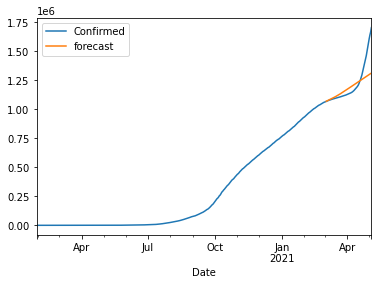

In [203]:


df['forecast']=round (results.predict(start="2021-3-3",end="2021-5-31",dynamic=True))

df[['Confirmed','forecast']].plot()

In [204]:
df['forecast'].tail(12)

Date
2021-04-23    1264688.0
2021-04-24    1268975.0
2021-04-25    1272990.0
2021-04-26    1277126.0
2021-04-27    1281349.0
2021-04-28    1285761.0
2021-04-29    1290025.0
2021-04-30    1294186.0
2021-05-01    1298204.0
2021-05-02    1302472.0
2021-05-03    1306659.0
2021-05-04    1310868.0
Name: forecast, dtype: float64

In [205]:
df[['Confirmed','forecast']].tail(12)

,Confirmed,forecast
Date,,
2021-04-23,1350501,1264688.0
2021-04-24,1377186,1268975.0
2021-04-25,1405655,1272990.0
2021-04-26,1427545,1277126.0
2021-04-27,1460364,1281349.0
2021-04-28,1495377,1285761.0
2021-04-29,1533984,1290025.0
2021-04-30,1571183,1294186.0
2021-05-01,1606819,1298204.0


In [206]:
from pandas.tseries.offsets import DateOffset


In [207]:

future_dates=[(df.index[-1])+DateOffset(days=x)for x in range(0,24)]

In [208]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


In [209]:
future_datest_df.tail()

,Confirmed,Confirmed difference,Seasonal difference,forecast
2021-05-23,NaN,NaN,NaN,NaN
2021-05-24,NaN,NaN,NaN,NaN
2021-05-25,NaN,NaN,NaN,NaN
2021-05-26,NaN,NaN,NaN,NaN
2021-05-27,NaN,NaN,NaN,NaN


In [210]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:title={'center':'predicted graph'}, xlabel='Date', ylabel='confirmed'>

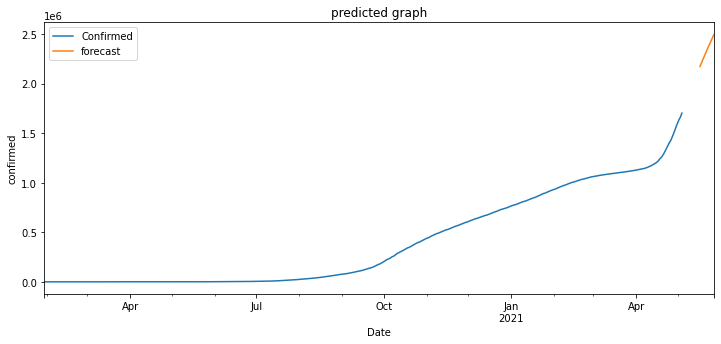

In [211]:
future_df['forecast']= results.predict(start='2021-5-17',end="2021-5-31",dynamic=True)


future_df[['Confirmed','forecast']].plot(figsize=(12,5),title="predicted graph",xlabel="Date",ylabel="confirmed")

In [212]:
future_df

,Confirmed,Confirmed difference,Seasonal difference,forecast
2020-01-30,1,0.0,0.0,NaN
2020-01-31,1,0.0,0.0,NaN
2020-02-01,1,0.0,0.0,NaN
2020-02-02,2,1.0,0.0,NaN
2020-02-03,3,1.0,0.0,NaN
...,...,...,...,...
2021-05-23,NaN,NaN,NaN,2.368194e+06
2021-05-24,NaN,NaN,NaN,2.399628e+06
2021-05-25,NaN,NaN,NaN,2.430259e+06
2021-05-26,NaN,NaN,NaN,2.462735e+06


In [213]:
round(future_df["forecast"]).tail()

2021-05-23    2368194.0
2021-05-24    2399628.0
2021-05-25    2430259.0
2021-05-26    2462735.0
2021-05-27    2492620.0
Name: forecast, dtype: float64

In [214]:
round(future_df.tail())

,Confirmed,Confirmed difference,Seasonal difference,forecast
2021-05-23,NaN,NaN,NaN,2368194.0
2021-05-24,NaN,NaN,NaN,2399628.0
2021-05-25,NaN,NaN,NaN,2430259.0
2021-05-26,NaN,NaN,NaN,2462735.0
2021-05-27,NaN,NaN,NaN,2492620.0


In [215]:
today=future_df[future_df.index=="2021-5-15"]

In [216]:
round(today)

,Confirmed,Confirmed difference,Seasonal difference,forecast
2021-05-15,NaN,NaN,NaN,NaN
